In [31]:
from pathlib import Path
import os

import time
import h5py

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from numpy import ma

import xarray as xr

import astropy.units as u
from astropy.coordinates import SkyCoord, Galactic, ICRS

import cosmoplotian.projections
import cosmoplotian.colormaps

In [8]:
root = Path(os.environ["SCRATCH"]) / "h1"
root.mkdir(exist_ok=True)

IHI = xr.open_dataset(root / "IHI_v_nside_0064.cdf")

In [14]:
query = hp.query_strip(64, np.radians(0), np.radians(20))

IHI['IHI_v'].sel(healpix_index=query).values.shape

IHI['logIHI_v'] = np.log10(IHI['IHI_v'])

/global/homes/b/bthorne/anaconda3/envs/h1/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


(array([  46.,   80.,   97.,   90.,   98.,  141.,  153.,  182.,  230.,
         267.,  337.,  421.,  482.,  541.,  683.,  750.,  881., 1119.,
        1216., 1482., 1623., 1918., 2088., 2297., 2293., 2187., 2001.,
        1861., 1793., 2192., 2205., 2215., 2088., 2237., 2572., 2737.,
        2704., 2455., 2104., 1724., 1336., 1021.,  778.,  553.,  344.,
         260.,  171.,  122.,   72.,   30.]),
 array([-2.  , -1.93, -1.86, -1.79, -1.72, -1.65, -1.58, -1.51, -1.44,
        -1.37, -1.3 , -1.23, -1.16, -1.09, -1.02, -0.95, -0.88, -0.81,
        -0.74, -0.67, -0.6 , -0.53, -0.46, -0.39, -0.32, -0.25, -0.18,
        -0.11, -0.04,  0.03,  0.1 ,  0.17,  0.24,  0.31,  0.38,  0.45,
         0.52,  0.59,  0.66,  0.73,  0.8 ,  0.87,  0.94,  1.01,  1.08,
         1.15,  1.22,  1.29,  1.36,  1.43,  1.5 ]),
 <a list of 50 Patch objects>)

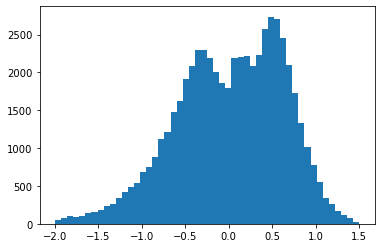

In [17]:
plt.hist(IHI['logIHI_v'].sel(healpix_index=query).values.flatten(), range=[-2, 1.5], bins=50)

In [42]:
thresholded_data = (IHI['logIHI_v'].sel(healpix_index=query) > 0).astype(int)

In [44]:
arr = ma.masked_all(hp.nside2npix(64))
arr.set_fill_value(np.nan)
arr[query] = thresholded_data.sum(dim=['channel_center']).values

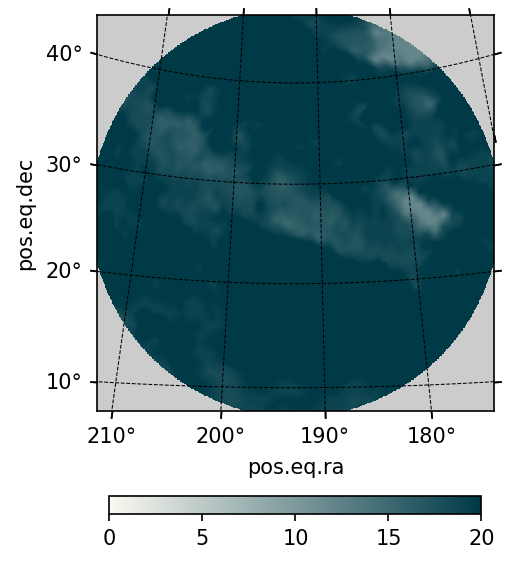

In [48]:
center = SkyCoord(l=0. * u.deg, b=90. * u.deg, frame=Galactic()).icrs
radius = 20. * u.deg
subplot_kws = {
    'projection': 'astro degrees zoom',
    'center': center,
    'radius': radius
}

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), dpi=150, subplot_kw=subplot_kws, sharey=True)

ax1.grid(linestyle='--', linewidth=0.5, color='k')
img1 = ax1.imshow_hpx((arr.filled(np.nan), Galactic()),  cmap='lin blu', vmin=0, vmax=20)
img1.cmap.set_bad('k', alpha=0.2)

cb = plt.colorbar(img1, orientation='horizontal', shrink=0.4, ax=ax1)
cb.solids.set_edgecolor('face')


In [ ]:
center = SkyCoord(l=0. * u.deg, b=90. * u.deg, frame=Galactic()).icrs
radius = 20. * u.deg
subplot_kws = {
    'projection': 'astro degrees zoom',
    'center': center,
    'radius': radius
}

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), dpi=150, subplot_kw=subplot_kws, sharey=True)

ax1.grid(linestyle='--', linewidth=0.5, color='k')
img1 = ax1.imshow_hpx((arr.filled(np.nan), Galactic()),  cmap='lin blu', vmin=0, vmax=10)
img1.cmap.set_bad('k', alpha=0.2)

cb = plt.colorbar(img1, orientation='horizontal', shrink=0.4, ax=ax1)
cb.solids.set_edgecolor('face')